## LSTM

### 1 [time-series-prediction](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

In [75]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [76]:
dataframe = pandas.read_csv('minite_stock_price.csv', engine='python', nrows=1440)
dataframe

,time,open price,highest price,lowest price,close price,turnover,volume,mean price
0,2015-07-17 9:31,23.98,24.04,23.79,23.81,35.06,1464500,23.90
1,2015-07-17 9:32,23.82,23.90,23.79,23.90,13.43,563900,23.86
2,2015-07-17 9:33,23.90,23.96,23.89,23.90,10.92,457000,23.90
3,2015-07-17 9:34,23.96,23.96,23.78,23.79,15.15,636300,23.88
4,2015-07-17 9:35,23.78,23.80,23.78,23.79,10.30,432900,23.79
5,2015-07-17 9:36,23.80,23.80,23.77,23.77,53.14,2235384,23.79
6,2015-07-17 9:37,23.78,23.78,23.56,23.60,15.65,660016,23.69
7,2015-07-17 9:38,23.55,23.60,23.51,23.60,20.63,876500,23.58
8,2015-07-17 9:39,23.58,23.70,23.58,23.69,8.50,359209,23.64
9,2015-07-17 9:40,23.70,23.71,23.68,23.68,9.11,384300,23.69


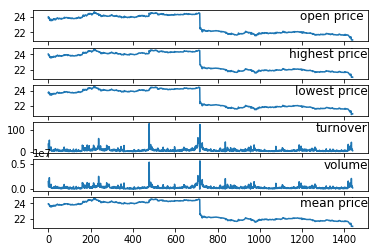

In [77]:
values = dataframe.values
# specify columns to plot
groups = [1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataframe.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [78]:
dataset = dataframe['close price'].values
dataset = dataset.astype('float32')
print dataset
dataset = dataset.reshape(len(dataset), 1)
print dataset

[ 23.80999947  23.89999962  23.89999962 ...,  20.97999954  20.97999954
  20.97999954]
[[ 23.80999947]
 [ 23.89999962]
 [ 23.89999962]
 ..., 
 [ 20.97999954]
 [ 20.97999954]
 [ 20.97999954]]


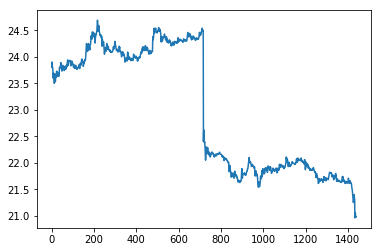

In [79]:
plt.plot(dataset)
plt.show()

In [80]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print dataset

[[ 0.7640748 ]
 [ 0.78820324]
 [ 0.78820324]
 ..., 
 [ 0.00536203]
 [ 0.00536203]
 [ 0.00536203]]


In [81]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(964, 476)


In [82]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print "trainX", trainX,
print "trainY", trainY,
print "testX", testX
print "testY", testY

trainX [[ 0.7640748 ]
 [ 0.78820324]
 [ 0.78820324]
 [ 0.75871325]
 [ 0.75871325]
 [ 0.75335121]
 [ 0.70777464]
 [ 0.70777464]
 [ 0.73190355]
 [ 0.7292223 ]
 [ 0.71045589]
 [ 0.68900824]
 [ 0.68096495]
 [ 0.69705057]
 [ 0.7292223 ]
 [ 0.72386026]
 [ 0.70509386]
 [ 0.68900824]
 [ 0.71581745]
 [ 0.71045589]
 [ 0.71045589]
 [ 0.72117949]
 [ 0.73458433]
 [ 0.74262714]
 [ 0.72386026]
 [ 0.71581745]
 [ 0.73994589]
 [ 0.73190355]
 [ 0.73458433]
 [ 0.73458433]
 [ 0.72386026]
 [ 0.72117949]
 [ 0.71849823]
 [ 0.71581745]
 [ 0.72117949]
 [ 0.72386026]
 [ 0.76139355]
 [ 0.76139355]
 [ 0.75871325]
 [ 0.75871325]
 [ 0.7640748 ]
 [ 0.76675558]
 [ 0.7801609 ]
 [ 0.78552246]
 [ 0.77211761]
 [ 0.75603199]
 [ 0.75066996]
 [ 0.75066996]
 [ 0.74262714]
 [ 0.75335121]
 [ 0.75871325]
 [ 0.7640748 ]
 [ 0.77211761]
 [ 0.75603199]
 [ 0.7640748 ]
 [ 0.75335121]
 [ 0.75066996]
 [ 0.75603199]
 [ 0.75871325]
 [ 0.74530792]
 [ 0.74798918]
 [ 0.76675558]
 [ 0.75871325]
 [ 0.75603199]
 [ 0.75603199]
 [ 0.75335121]
 [ 

In [84]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [85]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 3s - loss: 0.0960
Epoch 2/10
 - 3s - loss: 0.0082
Epoch 3/10
 - 3s - loss: 0.0011
Epoch 4/10
 - 3s - loss: 4.5812e-04
Epoch 5/10
 - 3s - loss: 4.5596e-04
Epoch 6/10
 - 3s - loss: 4.4789e-04
Epoch 7/10
 - 3s - loss: 4.4856e-04
Epoch 8/10
 - 3s - loss: 4.5274e-04
Epoch 9/10
 - 3s - loss: 4.5012e-04
Epoch 10/10
 - 2s - loss: 4.5530e-04
